In [1]:
from src.models.linreg import LinReg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



## Simple Linear Regression

In [2]:
"""Create our initial Dataset"""
np.random.seed(69)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 1, 100)
data = pd.DataFrame()
data = data.assign(outcome=y, independent=x)

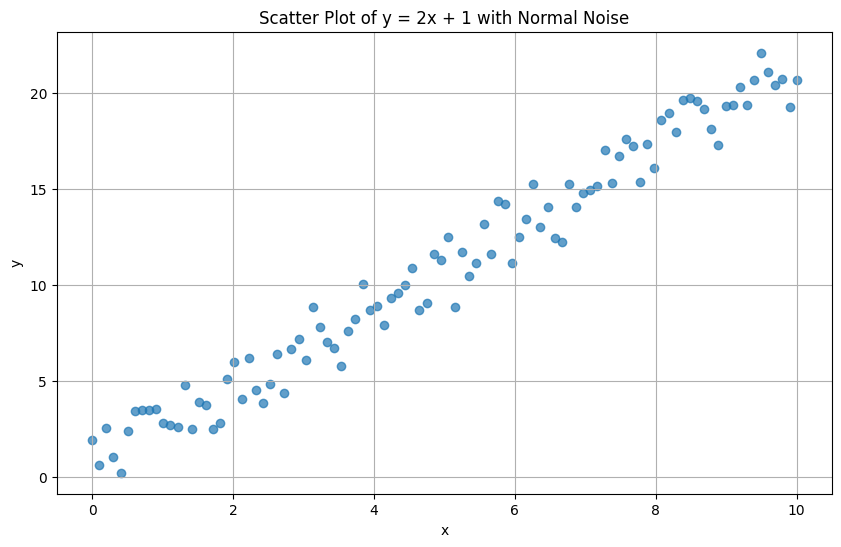

In [3]:
"""Plot the data"""
plt.figure(figsize=(10, 6))
plt.scatter(data['independent'], data['outcome'], alpha=0.7)
plt.title("Scatter Plot of y = 2x + 1 with Normal Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [4]:
"""Create our Linear Regression Model"""

model = LinReg(df=data, 
               outcome="outcome", 
               independent=["independent"],
               intercept=True,
               standard_error_type='non-robust')

fitted = model.fitted_values()
data = data.assign(fitted=fitted)



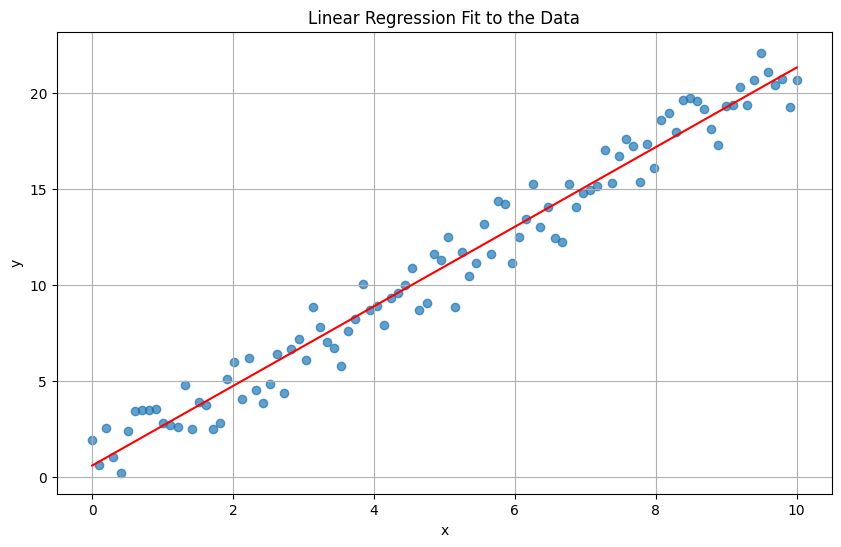

In [5]:

"""Plot the data with the fitted values"""
"""Plot the data"""
plt.figure(figsize=(10, 6))
plt.scatter(data['independent'], data['outcome'], alpha=0.7)
plt.plot(data['independent'], data['fitted'], color='red', label='Fitted Line')
plt.title("Linear Regression Fit to the Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [6]:
model.summary()

In [7]:
model.summary(content_type='static')

In [8]:
model.summary_data

{'Variable': ['Intercept', 'independent'],
 'Coefficient': [0.583, 2.076],
 'Std-Error': [0.219, 0.038],
 'T-Statistic': [2.667, 54.952],
 'P>|t|': [0.009, 0.0],
 'Conf. Interval': [[0.155, 1.012], [2.002, 2.15]]}

In [9]:
model.table

,Variable,Coefficient,Std-Error,T-Statistic,P>|t|,Lower Bound,Upper Bound
0,Intercept,0.583,0.219,2.667,0.009,0.155,1.012
1,independent,2.076,0.038,54.952,0.000,2.002,2.150


In [12]:
import statsmodels.formula.api as smf
model_smf = smf.ols('outcome ~ independent ', data).fit()
model_smf.params

Intercept      0.583027
independent    2.075699
dtype: float64

In [11]:

print('                            OLS Regression Results                            \n==============================================================================\nDep. Variable:                outcome   R-squared:                       0.969\nModel:                            OLS   Adj. R-squared:                  0.968\nMethod:                 Least Squares   F-statistic:                     3020.\nDate:                Wed, 27 Dec 2023   Prob (F-statistic):           1.92e-75\nTime:                        16:11:12   Log-Likelihood:                -150.54\nNo. Observations:                 100   AIC:                             305.1\nDf Residuals:                      98   BIC:                             310.3\nDf Model:                           1                                         \nCovariance Type:            nonrobust                                         \n===============================================================================\n                  coef    std err          t      P>|t|      [0.025      0.975]\n-------------------------------------------------------------------------------\nIntercept       0.5830      0.219      2.667      0.009       0.149       1.017\nindependent     2.0757      0.038     54.952      0.000       2.001       2.151\n==============================================================================\nOmnibus:                        8.303   Durbin-Watson:                   1.789\nProb(Omnibus):                  0.016   Jarque-Bera (JB):                3.595\nSkew:                          -0.171   Prob(JB):                        0.166\nKurtosis:                       2.136   Cond. No.                         11.7\n==============================================================================\n\nNotes:\n[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.')

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     3020.
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           1.92e-75
Time:                        16:11:12   Log-Likelihood:                -150.54
No. Observations:                 100   AIC:                             305.1
Df Residuals:                      98   BIC:                             310.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5830      0.219      2.667      